Ce exemple sert a construire un modele de regression lineair simple pour predire les prix des maisons en fonctionne de leur surafce (sqft_lot)

### Importer les Librairies

In [14]:
import pandas as pd # pour la manipulation de données
import matplotlib.pyplot as plt # tous ce qui est graphique
from sklearn.model_selection import train_test_split # pour diviser les données en données d'entrainement et de test
from sklearn.linear_model import LinearRegression # pour la régression linéaire

## Importer dataset

In [15]:
data = pd.read_csv('../data/housing.csv')

In [16]:
data.head() # affiche les 5 premières lignes du dataset
data.describe() # affiche des statist

,price,sqft_lot
count,150.000000,150.000000
mean,416330.792407,8026.493333
std,182771.877474,3865.116984
min,68402.128190,1064.000000
25%,263986.976773,4631.500000
50%,417967.681454,8153.500000
75%,572398.217825,11248.000000
max,761905.105885,14803.000000


### Afficher le nuage de points
cette nuage de points montre clairement que larelation entre les X, et les Y est une fonction lineaire 

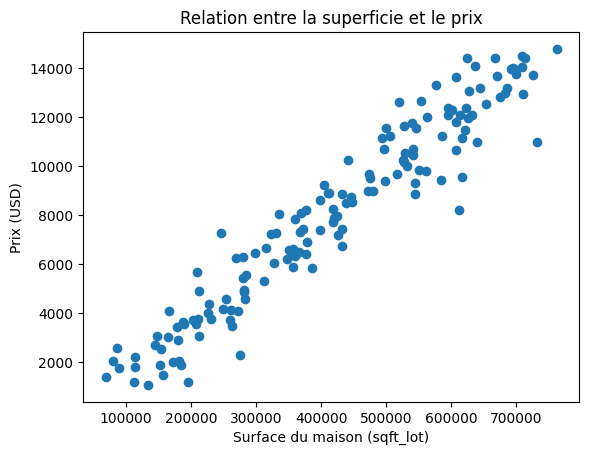

In [17]:
# plt.figure(figsize=(7,5))
plt.xlabel("Surface du maison (sqft_lot)")
plt.ylabel("Prix (USD)")
plt.title("Relation entre la superficie et le prix")
plt.scatter(data['price'], data['sqft_lot']) # affiche un nuage de points entre la superficie et le prix

on va attribuer la variable X le premiere colonne (surface), et pour la variable cible Y on va l'attribuer le prix de la maison

In [18]:
X = data['sqft_lot'].values # on récupère les valeurs de la surface du terrain
Y = data['price'].values # on récupère les valeurs du prix

# si on a plusieurs variables explicatives, on peut le récupérer de cette manière
# X = data.iloc[:, :-1].values # on récupère toutes les colonnes sauf la dernière

# X, Y

### Diviser le dataset
on va diviser le dataset en 2 parties, une pour l'entrainement/l'apprentissage et l'autre pour tester notre modèle.
on va utiliser la librairie scikit-learn pour faire cela

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Construire le modèle
tant que le modèle qu'on souhaitent construit est un modèle de régression linéaire, donc on va utiliser un regressor 

In [20]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1)) # faire apprendre le modèle en utilisant les données d'entrainement
# on a utilisé reshape(-1, 1) pour convertir x_train et y_train en un vecteur colonne

LinearRegression()

### Predictions
faire des prédictions en utilisant les données de tests, on va predire les prix des maison qui se trouve dans la base loyer, et on va le comparer avec Y_test pour evaluer la performance de notre modèle

y = 45.5261475172563x + 48857.701178531046
[[53410.31593026]]


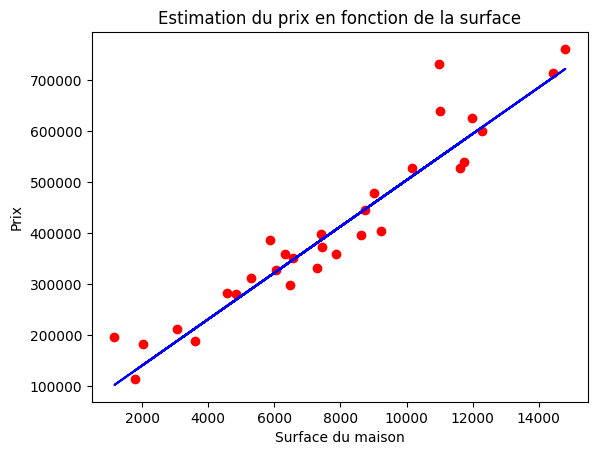

In [21]:
Y_pred = regressor.predict(X_test.reshape(-1, 1))
# y_test
# Y_pred

# visualiser le nuage des points et tracer la droit de régression
plt.title("Estimation du prix en fonction de la surface")
plt.xlabel("Surface du maison")
plt.ylabel("Prix")
plt.plot(X_test, Y_pred, color='blue')
plt.scatter(X_test, y_test, color='red')

# il y a pas une grande différence entre les valeurs prédites et les valeurs réelles

# pour afficher l'équation de la droite
print("y = {}x + {}".format(regressor.coef_[0][0], regressor.intercept_[0]))

# on peut prédire le prix d'une maison qu'il n'existe pas dans le dataset
# par exemple une maison de 100 sqft_lot
print(regressor.predict([[100]])) # [[100]] pour convertir 500 en un vecteur colonne


### Calculer le score

In [27]:
regressor.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))


0.9050614930324469